In [4]:
persres = []
with open(r"C:\Users\ivanr\Documents\cod\kursach\genp_pers_ChatGPT_res.txt", 'r', encoding="UTF-8") as f:
    for line in f:
        persres.append(line)

Чат гпт отфильтровал список сущностей, полученный на основе анализа текста через DeepPavlov и Natasha. Теперь для каждого персонажа получим описание из википедии

In [ ]:
import wikipedia
import re

wikipedia.set_lang("ru")

def get_first_paragraph_first_sentence(name):
    try:
        page = wikipedia.page(name)
    except Exception as e:
        return None

    content = page.content
    paragraphs = content.split("\n\n")
    if not paragraphs:
        return None
    first_paragraph = paragraphs[0]
    cleaned_paragraph = re.sub(r"\([^)]*\)", "", first_paragraph)
    sentences = re.split(r'\.\s+', cleaned_paragraph)
    if sentences:
        return sentences[0].strip()
    return cleaned_paragraph.strip()

pers_with_description = dict()
for per in persres:
    sentence = get_first_paragraph_first_sentence(per)
    if sentence != None:
        pers_with_description[per] = sentence

Я создал json файл, в котором приведены категории для классификации персонажей, а также ключевые слова, по которым будет происходить отнесение к той или иной категории. На его основании проведём классификацию

In [ ]:
import json

with open(r"C:\Users\ivanr\Documents\cod\kursach\classification_dict.json", 'r', encoding='UTF-8') as f:
    categories = json.load(f)

pers_with_categories = dict()

for per, descr in pers_with_description.items():
    descr = descr.lower()
    for main_cat in categories.keys():
        for sub_cat in categories[main_cat].keys():
            for key_word in categories[main_cat][sub_cat]:
                if (key_word in descr):
                    if (per in pers_with_categories.keys()):
                        if main_cat not in pers_with_categories[per]:
                            pers_with_categories[per].append(main_cat)
                        if sub_cat not in pers_with_categories[per]:
                            pers_with_categories[per].append(sub_cat)
                    else:
                        pers_with_categories[per] = [main_cat, sub_cat]

Теперь построим графики для главных категорий и для подкатегорий 

C:\Users\ivanr\AppData\Local\Temp\ipykernel_16760\2947832997.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Main Category", y="Count", palette="Spectral")


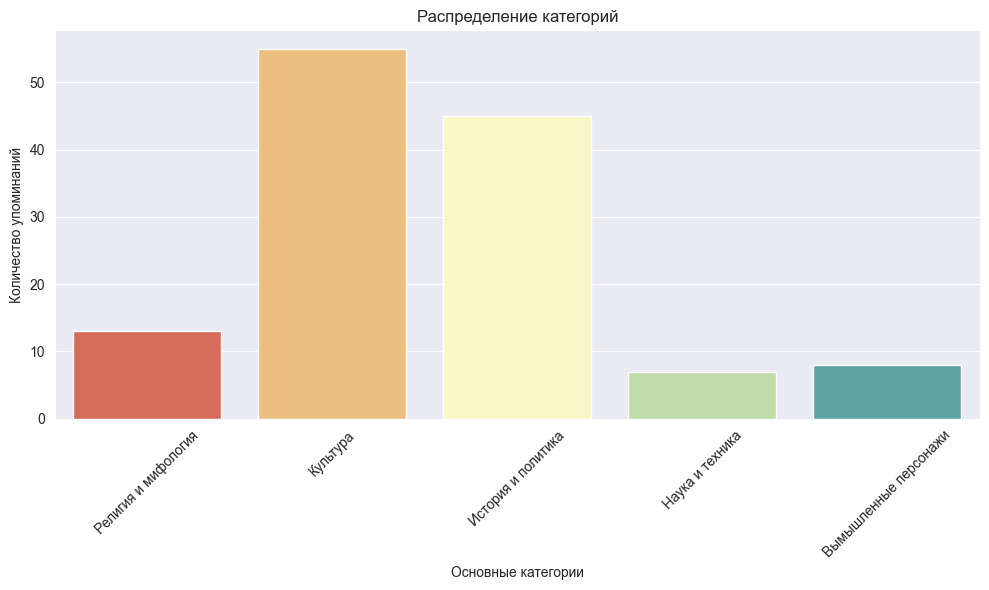

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

with open(r'C:\Users\ivanr\Documents\cod\kursach\genp_pers_classification_res.txt', 'r', encoding="UTF-8") as f:
    final_dict = dict(zip(*[iter([line.strip() for line in f if line.strip()])]*2))

main_cats = [cat for cat in categories.keys()]
main_cats_count = dict()
for per, cats in final_dict.items():
    for main_cat in main_cats:
        if main_cat in ast.literal_eval(cats):
            if main_cat not in main_cats_count.keys():
                main_cats_count[main_cat] = 1
            else:
                main_cats_count[main_cat] += 1

df = pd.DataFrame({
    "Main Category": main_cats_count.keys(),
    "Count": main_cats_count.values()
})
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Main Category", y="Count", palette="Spectral")
plt.xlabel("Основные категории")
plt.ylabel("Количество упоминаний")
plt.title("Распределение категорий")
sns.set_style("darkgrid")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("main_barplot.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\ivanr\AppData\Local\Temp\ipykernel_16760\3246568295.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Category", y="Count", palette="viridis")


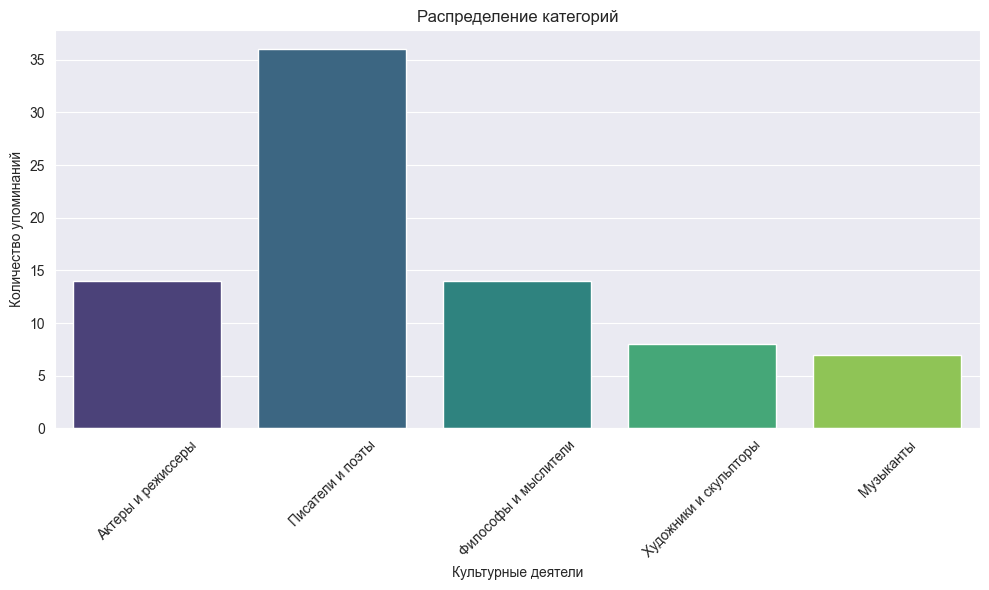

In [53]:
cult_dict_count = dict()

for per, cats in final_dict.items():
    if "Культура" in ast.literal_eval(cats):
        for cat in ast.literal_eval(cats):
            if cat in categories["Культура"].keys():
                if cat not in cult_dict_count.keys():
                    cult_dict_count[cat] = 1
                else:
                    cult_dict_count[cat] += 1

df = pd.DataFrame({
    "Category": cult_dict_count.keys(),
    "Count": cult_dict_count.values()
})
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Category", y="Count", palette="viridis")
plt.xlabel("Культурные деятели")
plt.ylabel("Количество упоминаний")
plt.title("Распределение категорий")
sns.set_style("dark")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cult_barplot.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\ivanr\AppData\Local\Temp\ipykernel_16760\4109764333.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Category", y="Count", palette="magma")


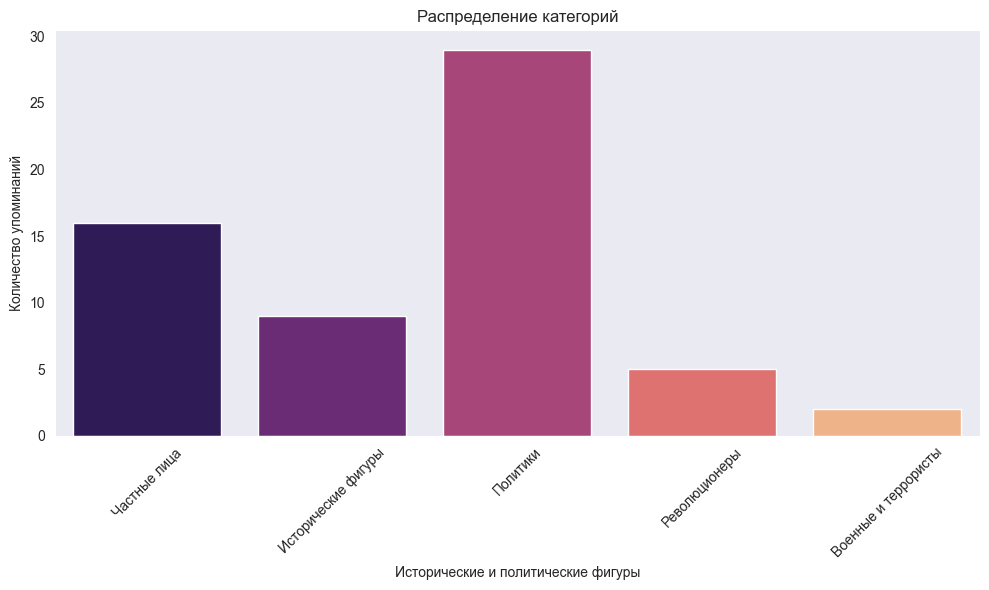

In [54]:
hist_dict_count = dict()

for per, cats in final_dict.items():
    if "История и политика" in ast.literal_eval(cats):
        for cat in ast.literal_eval(cats):
            if cat in categories["История и политика"].keys():
                if cat not in hist_dict_count.keys():
                    hist_dict_count[cat] = 1
                else:
                    hist_dict_count[cat] += 1

df = pd.DataFrame({
    "Category": hist_dict_count.keys(),
    "Count": hist_dict_count.values()
})
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Category", y="Count", palette="magma")
plt.xlabel("Исторические и политические фигуры")
plt.ylabel("Количество упоминаний")
plt.title("Распределение категорий")
sns.set_style("dark")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("hist_barplot.png", dpi=300, bbox_inches="tight")
plt.show()